<a href="https://colab.research.google.com/github/pgomesbueno/bigdata_docker/blob/master/PREVIS%C3%83O_DE_RISCO_DE_DOEN%C3%87AS_CARDIOVASCULARES_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predição de Risco de Doenças Cardiovasculares através do estilo de vida
## Regressão Linear Multipla


In [116]:
import numpy as np
import pandas as pd

In [117]:
url_arquivo_csv = 'https://drive.google.com/uc?id=1RcE3_zjMMB69LPO_V6iq4ovqKtiOnqSp'

In [ ]:
##Locais disponibilidade do arquivo
print('https://drive.google.com/uc?id=1RcE3_zjMMB69LPO_V6iq4ovqKtiOnqSp')
print('https://www.kaggle.com/datasets/alphiree/cardiovascular-diseases-risk-prediction-dataset?resource=download')

https://drive.google.com/uc?id=1RcE3_zjMMB69LPO_V6iq4ovqKtiOnqSp
https://www.kaggle.com/datasets/alphiree/cardiovascular-diseases-risk-prediction-dataset?resource=download


In [118]:
CVD_cleaned = pd.read_csv(url_arquivo_csv)

In [95]:
#Apresentação das Colunas
CVD_cleaned.columns

Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Altura (cm)', 'Peso (kg)',
       'Índice de Massa Corporal (IMC)', 'Smoking_History',
       'Consumo de Álcool', 'Consumo de Frutas', 'Consumo de Vegetais Verdes',
       'Consumo de Batata Frita'],
      dtype='object')

In [119]:
#Leitura dos dados
CVD_cleaned.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [89]:
#Distribuição dos dados
CVD_cleaned.describe()

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000
mean,170.615249,83.588655,28.626211,5.096366,29.835200,15.110441,6.296616
std,10.658026,21.343210,6.522323,8.199763,24.875735,14.926238,8.582954
min,91.000000,24.950000,12.020000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,68.040000,24.210000,0.000000,12.000000,4.000000,2.000000
50%,170.000000,81.650000,27.440000,1.000000,30.000000,12.000000,4.000000
75%,178.000000,95.250000,31.850000,6.000000,30.000000,20.000000,8.000000
max,241.000000,293.020000,99.330000,30.000000,120.000000,128.000000,128.000000


In [90]:
#Tamanho do DataSet
CVD_cleaned.shape

(308854, 19)

In [91]:
# Tipo de Dados
CVD_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

## Análise inicial  
### **Objetivo:** Criar modelo matemático de regressão linear múltipla para prever risco de doenças cardiovasculares

### Verificação da Base para posiveis ajustes

In [121]:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder

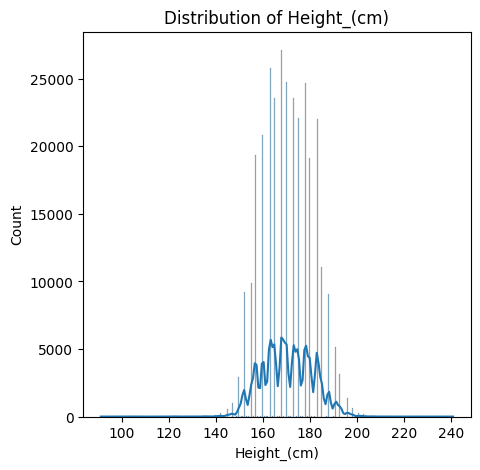

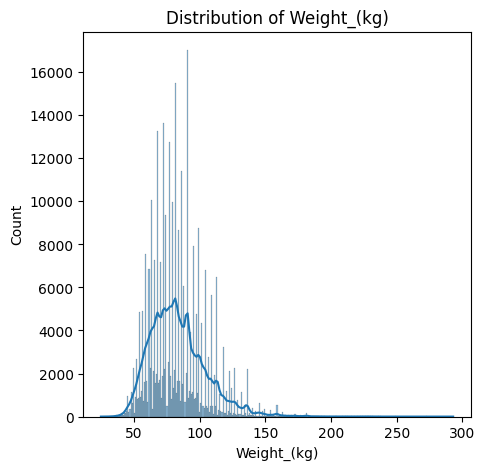

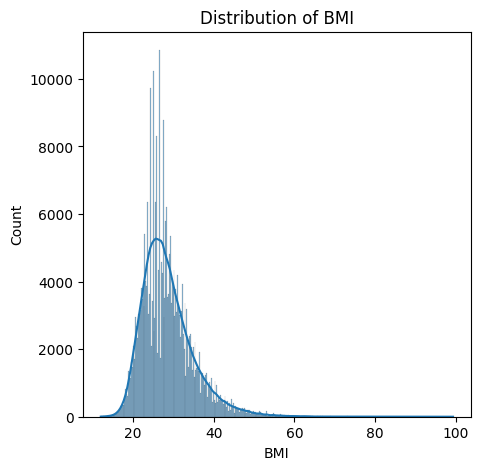

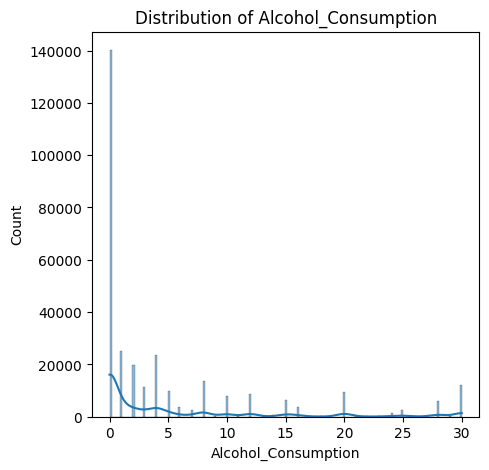

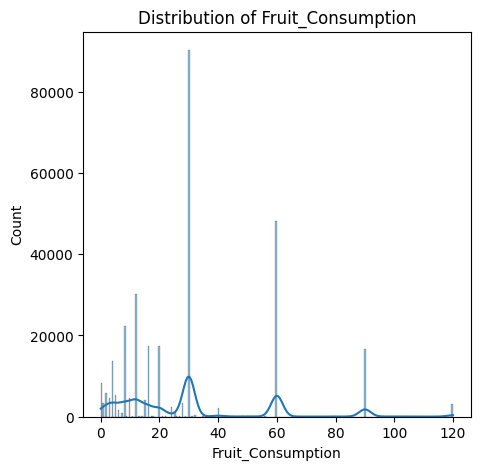

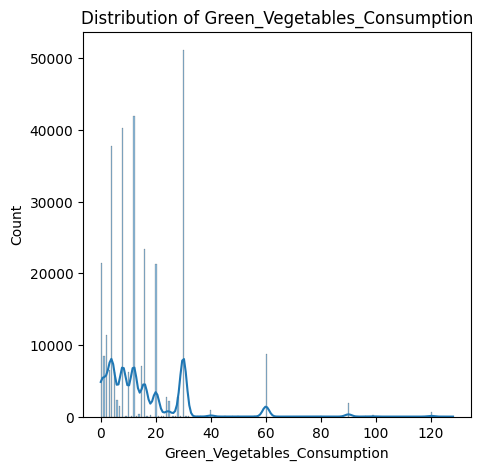

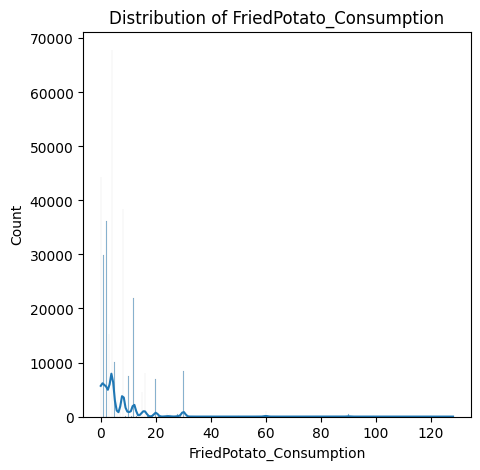

In [124]:

numerical_features = ['Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']

for feature in numerical_features:
    plt.figure(figsize=(5, 5))
    sns.histplot(data=CVD_cleaned, x=feature, kde=True)
    plt.title('Distribution of ' + feature)
    plt.show()

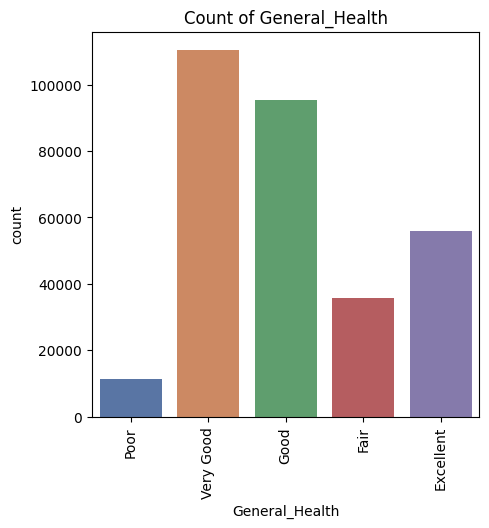

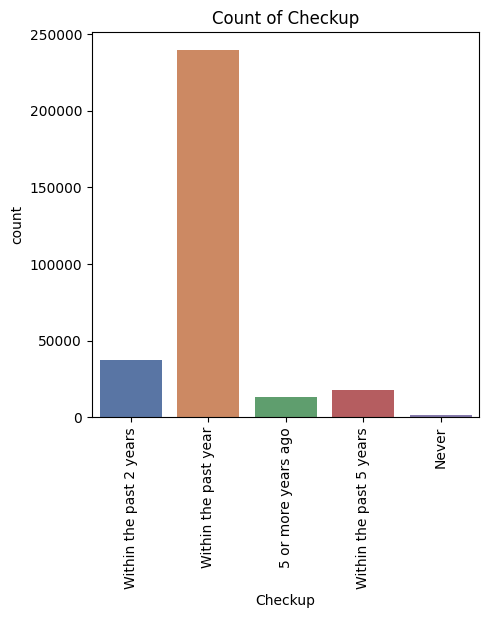

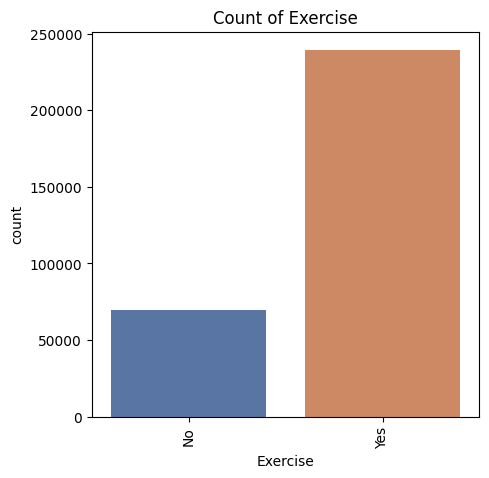

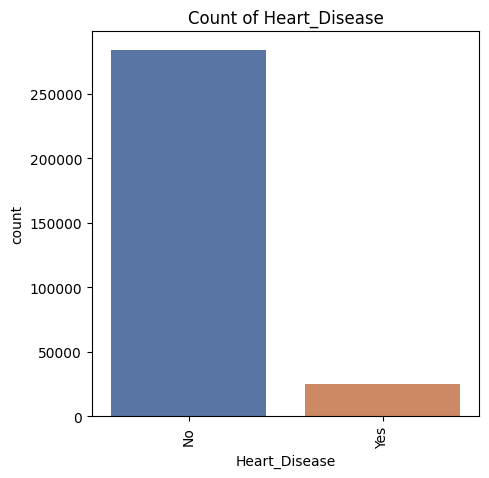

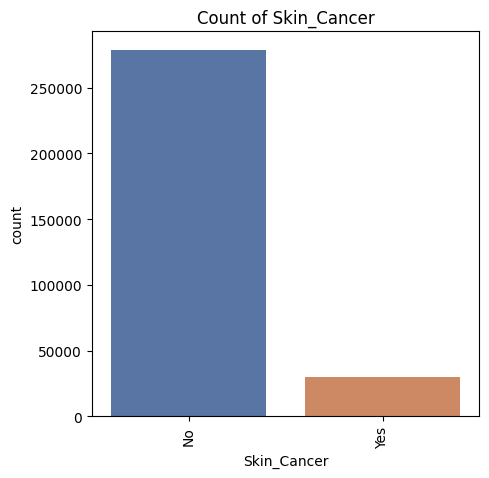

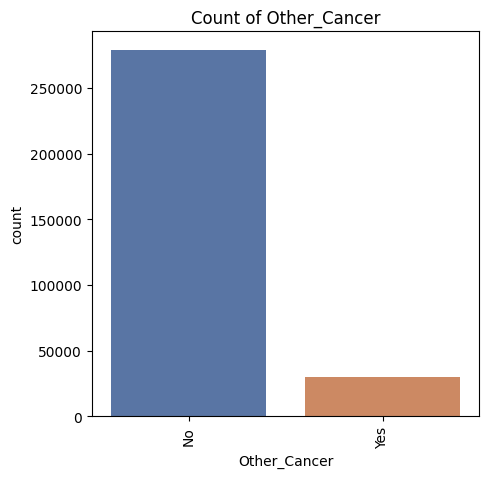

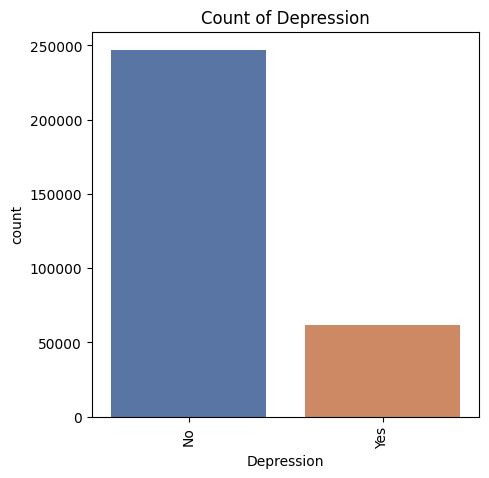

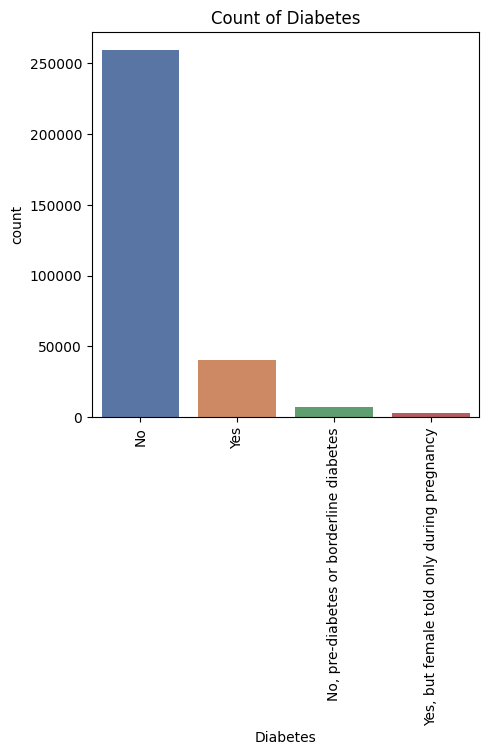

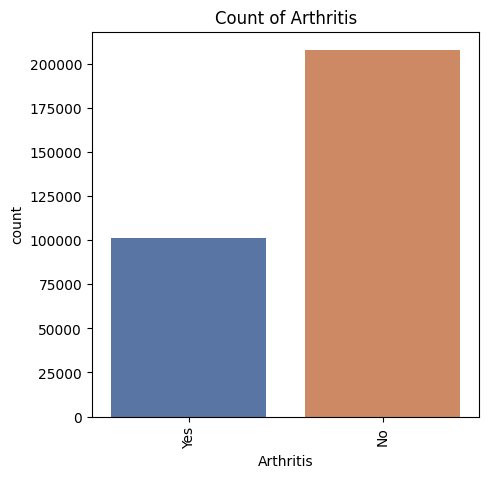

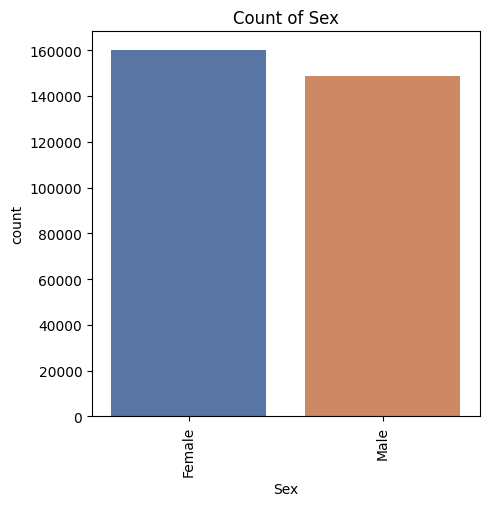

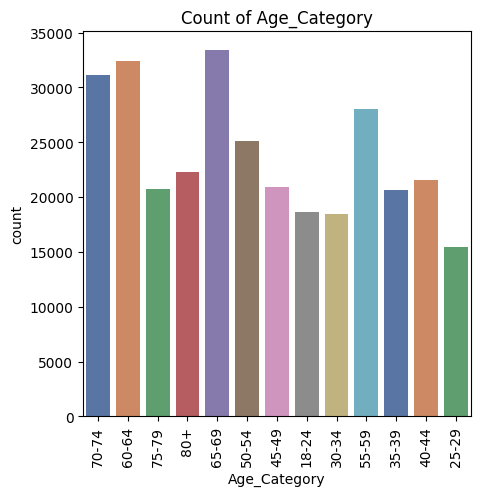

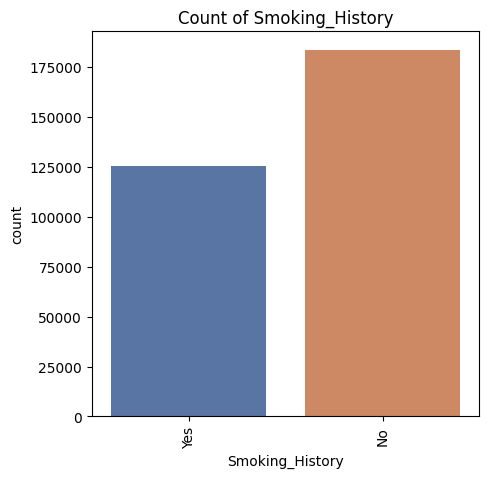

In [125]:
categorical_features = ['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex', 'Age_Category', 'Smoking_History']

for feature in categorical_features:
    plt.figure(figsize=(5, 5))
    sns.countplot(data=CVD_cleaned, x=feature, palette='deep')
    plt.title('Count of ' + feature)
    plt.xticks(rotation=90)
    plt.show()